In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import seaborn as sns
from collections import Counter
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)
# https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\pet\train.csv')
test=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\pet\test.csv')

In [3]:
test.shape
train.shape

(8072, 9)

(18834, 11)

In [4]:
train.head()
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


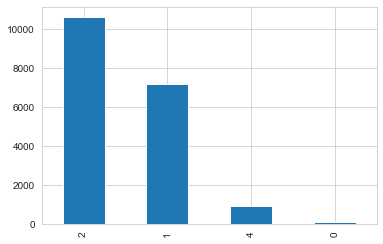

In [5]:

train.pet_category.value_counts().plot(kind='bar')

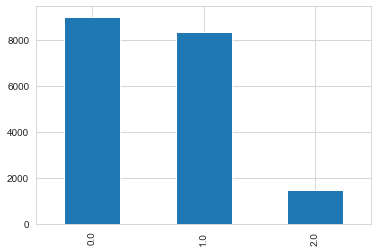

In [6]:
# train.breed_category.value_counts()
train.breed_category.value_counts().plot(kind='bar')

In [7]:
train['issue_year']=pd.DatetimeIndex(train['issue_date']).year
train['listing_year']=pd.DatetimeIndex(train['listing_date']).year
train['issue_month']=pd.DatetimeIndex(train['issue_date']).month
train['listing_month']=pd.DatetimeIndex(train['listing_date']).month

In [8]:
test['issue_year']=pd.DatetimeIndex(test['issue_date']).year
test['listing_year']=pd.DatetimeIndex(test['listing_date']).year
test['issue_month']=pd.DatetimeIndex(test['issue_date']).month
test['listing_month']=pd.DatetimeIndex(test['listing_date']).month

In [9]:
train=pd.get_dummies(train, columns=["color_type"])
test=pd.get_dummies(test, columns=["color_type"])

In [10]:
i_d=test.pet_id

In [11]:
train=train.drop(['pet_id','issue_date','listing_date'],axis=1)
test=test.drop(['pet_id','issue_date','listing_date'],axis=1)

In [68]:
# train.isnull().sum()
# test.isnull().sum()

In [12]:
imp=SimpleImputer(missing_values=np.NaN)
mtrain=pd.DataFrame(imp.fit_transform(train))
mtrain.columns=train.columns
mtrain.index=train.index

In [13]:
imp=SimpleImputer(missing_values=np.NaN)
mtest=pd.DataFrame(imp.fit_transform(test))
mtest.columns=test.columns
mtest.index=test.index

In [14]:
mtest.columns
mtrain.columns

Index(['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'issue_year',
       'listing_year', 'issue_month', 'listing_month', 'color_type_Agouti',
       'color_type_Apricot', 'color_type_Black', 'color_type_Black Brindle',
       'color_type_Black Smoke', 'color_type_Black Tabby', 'color_type_Blue',
       'color_type_Blue Cream', 'color_type_Blue Merle',
       'color_type_Blue Point', 'color_type_Blue Smoke',
       'color_type_Blue Tabby', 'color_type_Blue Tick',
       'color_type_Blue Tiger', 'color_type_Brown', 'color_type_Brown Brindle',
       'color_type_Brown Merle', 'color_type_Brown Tabby', 'color_type_Buff',
       'color_type_Calico', 'color_type_Calico Point', 'color_type_Chocolate',
       'color_type_Chocolate Point', 'color_type_Cream',
       'color_type_Cream Tabby', 'color_type_Fawn', 'color_type_Flame Point',
       'color_type_Gold', 'color_type_Gray', 'color_type_Gray Tabby',
       'color_type_Green', 'color_type_Lilac Point', 'color_type_Liver',
       'col

Index(['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'color_type_Agouti', 'color_type_Apricot',
       'color_type_Black', 'color_type_Black Brindle',
       'color_type_Black Smoke', 'color_type_Black Tabby',
       'color_type_Black Tiger', 'color_type_Blue', 'color_type_Blue Cream',
       'color_type_Blue Merle', 'color_type_Blue Point',
       'color_type_Blue Smoke', 'color_type_Blue Tabby',
       'color_type_Blue Tick', 'color_type_Blue Tiger', 'color_type_Brown',
       'color_type_Brown Brindle', 'color_type_Brown Merle',
       'color_type_Brown Tabby', 'color_type_Brown Tiger', 'color_type_Buff',
       'color_type_Calico', 'color_type_Calico Point', 'color_type_Chocolate',
       'color_type_Chocolate Point', 'color_type_Cream',
       'color_type_Cream Tabby', 'color_type_Fawn', 'color_type_Flame Point',
       'color_type_Gold', 'color_type_Gray', 'color_ty

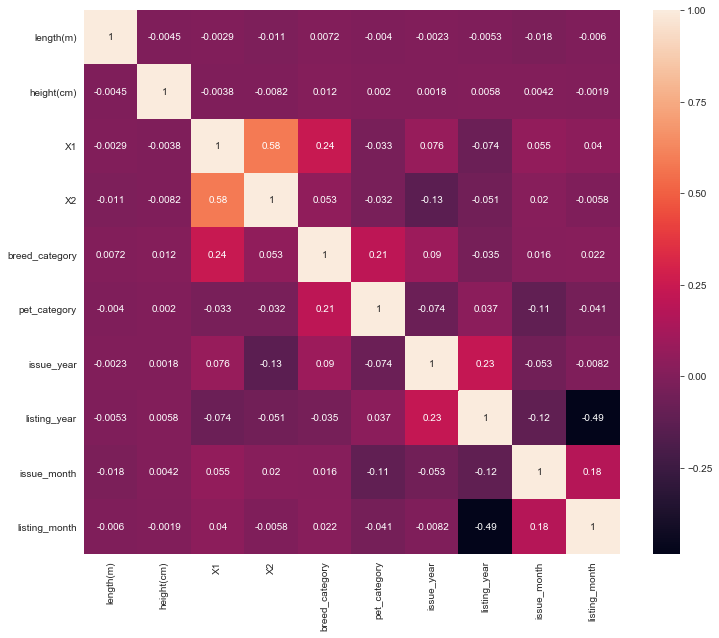

In [72]:

sns.heatmap(train[[ 'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category', 'issue_year', 'listing_year', 'issue_month',
       'listing_month']].corr(), annot = True)

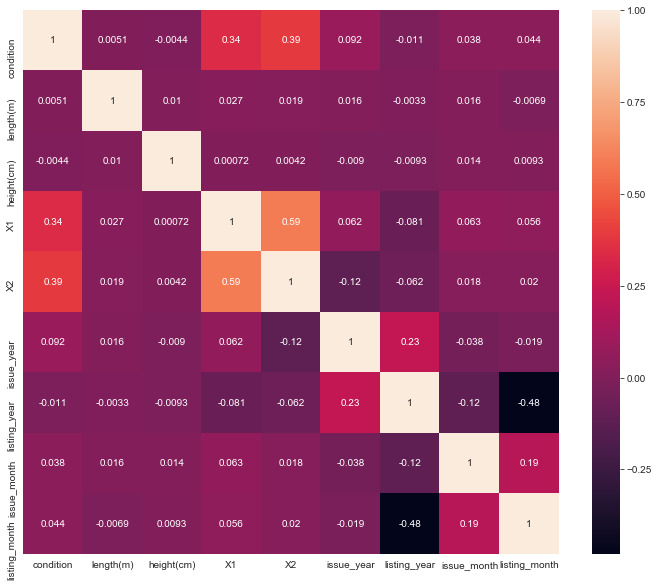

In [73]:

sns.heatmap(test[['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month']].corr(), annot = True)

In [74]:
train.groupby('breed_category')['condition'].value_counts()

breed_category  condition
0.0             1.0          6819
                2.0          2181
1.0             0.0          6281
                2.0          2076
Name: condition, dtype: int64

In [90]:
train.head()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,listing_year,issue_month,...,color_type_Silver Lynx Point,color_type_Silver Tabby,color_type_Tan,color_type_Torbie,color_type_Tortie,color_type_Tortie Point,color_type_Tricolor,color_type_White,color_type_Yellow,color_type_Yellow Brindle
0,2.0,0.80,7.78,13,9,0.0,1,2016,2016,7,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.72,14.19,13,9,0.0,2,2013,2018,11,...,0,0,0,0,0,0,0,1,0,0
2,NaN,0.15,40.90,15,4,2.0,4,2014,2016,9,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.62,17.82,0,1,0.0,2,2016,2019,12,...,0,0,0,0,0,0,0,1,0,0
4,2.0,0.50,11.06,18,4,0.0,1,2017,2017,9,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X=train.drop(['breed_category','pet_category','color_type_Black Tiger','color_type_Brown Tiger'],axis=1)
Y=train.breed_category

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=27)

In [28]:
xgb=XGBClassifier(n_estimators=400,learning_rate=0.06,objective='multi:softprob')
cross_val_score(xgb, X, Y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.3min finished


0.9000676156261086

In [36]:
lgbmc = LGBMClassifier(random_state=201, n_estimators=420,sample_bytree=1, 
                       max_depth=31, learning_rate=0.06, boosting_type='gbdt')
cross_val_score(lgbmc, X, Y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.3s finished


0.8991110354064679

In [29]:
cb=CatBoostClassifier(iterations=400,learning_rate=0.06)
cross_val_score(cb, X, Y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.2s finished


0.9027123105415147

In [30]:
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
lgbmc.fit(X_train, y_train)
j = lgbmc.predict(X_test)

LGBMClassifier(learning_rate=0.06, max_depth=31, n_estimators=420,
               random_state=201, sample_bytree=1)

In [32]:
cb.fit(X_train,y_train)
cpred=cb.predict(X_test)

0:	learn: 1.0028491	total: 19.3ms	remaining: 7.71s
1:	learn: 0.9223611	total: 31.6ms	remaining: 6.3s
2:	learn: 0.8527261	total: 45.1ms	remaining: 5.97s
3:	learn: 0.7924494	total: 59.8ms	remaining: 5.92s
4:	learn: 0.7397074	total: 85.7ms	remaining: 6.77s
5:	learn: 0.6926031	total: 99.3ms	remaining: 6.52s
6:	learn: 0.6507902	total: 111ms	remaining: 6.24s
7:	learn: 0.6128071	total: 121ms	remaining: 5.94s
8:	learn: 0.5788789	total: 133ms	remaining: 5.79s
9:	learn: 0.5480612	total: 145ms	remaining: 5.66s
10:	learn: 0.5197567	total: 156ms	remaining: 5.52s
11:	learn: 0.4939483	total: 168ms	remaining: 5.43s
12:	learn: 0.4704164	total: 180ms	remaining: 5.35s
13:	learn: 0.4488707	total: 191ms	remaining: 5.28s
14:	learn: 0.4288647	total: 208ms	remaining: 5.35s
15:	learn: 0.4105780	total: 233ms	remaining: 5.58s
16:	learn: 0.3937364	total: 246ms	remaining: 5.55s
17:	learn: 0.3781805	total: 263ms	remaining: 5.57s
18:	learn: 0.3637425	total: 274ms	remaining: 5.5s
19:	learn: 0.3503503	total: 286ms	rem

165:	learn: 0.1452654	total: 2.38s	remaining: 3.36s
166:	learn: 0.1451701	total: 2.4s	remaining: 3.35s
167:	learn: 0.1450759	total: 2.42s	remaining: 3.34s
168:	learn: 0.1450214	total: 2.43s	remaining: 3.32s
169:	learn: 0.1449476	total: 2.44s	remaining: 3.3s
170:	learn: 0.1447606	total: 2.45s	remaining: 3.29s
171:	learn: 0.1446555	total: 2.47s	remaining: 3.27s
172:	learn: 0.1445744	total: 2.48s	remaining: 3.25s
173:	learn: 0.1445039	total: 2.49s	remaining: 3.23s
174:	learn: 0.1443981	total: 2.5s	remaining: 3.22s
175:	learn: 0.1443350	total: 2.52s	remaining: 3.21s
176:	learn: 0.1442343	total: 2.53s	remaining: 3.19s
177:	learn: 0.1441485	total: 2.55s	remaining: 3.18s
178:	learn: 0.1440774	total: 2.58s	remaining: 3.18s
179:	learn: 0.1440427	total: 2.59s	remaining: 3.16s
180:	learn: 0.1439815	total: 2.6s	remaining: 3.15s
181:	learn: 0.1438975	total: 2.61s	remaining: 3.13s
182:	learn: 0.1438265	total: 2.63s	remaining: 3.12s
183:	learn: 0.1436844	total: 2.64s	remaining: 3.1s
184:	learn: 0.143

334:	learn: 0.1345346	total: 4.92s	remaining: 955ms
335:	learn: 0.1344754	total: 4.93s	remaining: 940ms
336:	learn: 0.1344171	total: 4.95s	remaining: 925ms
337:	learn: 0.1343053	total: 4.99s	remaining: 915ms
338:	learn: 0.1342628	total: 5s	remaining: 901ms
339:	learn: 0.1341602	total: 5.02s	remaining: 886ms
340:	learn: 0.1341094	total: 5.03s	remaining: 870ms
341:	learn: 0.1340667	total: 5.04s	remaining: 855ms
342:	learn: 0.1340432	total: 5.05s	remaining: 840ms
343:	learn: 0.1339897	total: 5.07s	remaining: 825ms
344:	learn: 0.1339629	total: 5.08s	remaining: 809ms
345:	learn: 0.1339282	total: 5.1s	remaining: 796ms
346:	learn: 0.1338532	total: 5.12s	remaining: 783ms
347:	learn: 0.1338342	total: 5.15s	remaining: 769ms
348:	learn: 0.1338046	total: 5.16s	remaining: 754ms
349:	learn: 0.1337572	total: 5.18s	remaining: 741ms
350:	learn: 0.1336832	total: 5.2s	remaining: 726ms
351:	learn: 0.1336458	total: 5.22s	remaining: 712ms
352:	learn: 0.1335708	total: 5.24s	remaining: 697ms
353:	learn: 0.133

In [40]:
print(accuracy_score(pred,y_test))
print(accuracy_score(cpred,y_test))
print(accuracy_score(j,y_test))

0.8997664047568485
0.898067530261202
0.8965810150775112


In [41]:
lpred=xgb.predict(test)

<h5>Prediciton for Pet_Category</h5>

In [42]:
trainp=mtrain.copy()

In [43]:
XP=trainp.drop(['pet_category','color_type_Black Tiger', 'breed_category', 'color_type_Brown Tiger'],axis=1)
YP=trainp.pet_category

In [44]:
X_trainp, X_testp, y_trainp, y_testp = train_test_split(XP, YP, test_size=0.25, random_state=27)

In [45]:
xgbp=XGBClassifier(n_estimators=400,objective='multi:softprob')
cross_val_score(xgbp, XP, YP, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.8min finished


0.8873006852339577

In [46]:
cbp=CatBoostClassifier(iterations=400,learning_rate=0.06)
cross_val_score(cbp, XP, YP, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.1s finished


0.8900208003008944

In [47]:
lgbmp = LGBMClassifier(random_state=201, n_estimators=410, colsample_bytree=1, 
                       max_depth=31, learning_rate=0.06, boosting_type='gbdt')
cross_val_score(lgbmc, XP, YP, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.8s finished


0.894080223646936

In [48]:
lgbmp.fit(X_trainp,y_trainp)
j=lgbmp.predict(X_testp)

LGBMClassifier(colsample_bytree=1, learning_rate=0.06, max_depth=31,
               n_estimators=410, random_state=201)

In [49]:
xgbp.fit(X_trainp,y_trainp)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
cbp.fit(X_trainp,y_trainp)

0:	learn: 1.2900808	total: 16.7ms	remaining: 6.67s
1:	learn: 1.2096080	total: 31.4ms	remaining: 6.25s
2:	learn: 1.1427051	total: 52.2ms	remaining: 6.9s
3:	learn: 1.0848621	total: 66.9ms	remaining: 6.62s
4:	learn: 1.0309255	total: 81.7ms	remaining: 6.45s
5:	learn: 0.9883183	total: 96.4ms	remaining: 6.33s
6:	learn: 0.9472121	total: 110ms	remaining: 6.2s
7:	learn: 0.9083996	total: 124ms	remaining: 6.08s
8:	learn: 0.8736185	total: 139ms	remaining: 6.02s
9:	learn: 0.8434863	total: 153ms	remaining: 5.95s
10:	learn: 0.8146390	total: 166ms	remaining: 5.88s
11:	learn: 0.7893466	total: 180ms	remaining: 5.83s
12:	learn: 0.7668910	total: 194ms	remaining: 5.79s
13:	learn: 0.7459687	total: 227ms	remaining: 6.26s
14:	learn: 0.7257447	total: 246ms	remaining: 6.32s
15:	learn: 0.7056871	total: 260ms	remaining: 6.25s
16:	learn: 0.6855653	total: 275ms	remaining: 6.19s
17:	learn: 0.6695630	total: 289ms	remaining: 6.13s
18:	learn: 0.6536049	total: 303ms	remaining: 6.07s
19:	learn: 0.6397208	total: 317ms	rem

163:	learn: 0.3249295	total: 2.59s	remaining: 3.73s
164:	learn: 0.3245777	total: 2.61s	remaining: 3.72s
165:	learn: 0.3243427	total: 2.62s	remaining: 3.7s
166:	learn: 0.3239584	total: 2.64s	remaining: 3.68s
167:	learn: 0.3236730	total: 2.65s	remaining: 3.66s
168:	learn: 0.3229989	total: 2.67s	remaining: 3.64s
169:	learn: 0.3227067	total: 2.68s	remaining: 3.62s
170:	learn: 0.3221457	total: 2.69s	remaining: 3.61s
171:	learn: 0.3218724	total: 2.71s	remaining: 3.59s
172:	learn: 0.3213572	total: 2.72s	remaining: 3.57s
173:	learn: 0.3205066	total: 2.73s	remaining: 3.55s
174:	learn: 0.3200528	total: 2.75s	remaining: 3.53s
175:	learn: 0.3196376	total: 2.77s	remaining: 3.52s
176:	learn: 0.3192811	total: 2.78s	remaining: 3.51s
177:	learn: 0.3187587	total: 2.8s	remaining: 3.49s
178:	learn: 0.3183393	total: 2.81s	remaining: 3.47s
179:	learn: 0.3178351	total: 2.83s	remaining: 3.45s
180:	learn: 0.3176558	total: 2.84s	remaining: 3.44s
181:	learn: 0.3173209	total: 2.85s	remaining: 3.42s
182:	learn: 0.

326:	learn: 0.2809473	total: 4.96s	remaining: 1.11s
327:	learn: 0.2808469	total: 4.97s	remaining: 1.09s
328:	learn: 0.2807061	total: 4.99s	remaining: 1.08s
329:	learn: 0.2804973	total: 5s	remaining: 1.06s
330:	learn: 0.2804509	total: 5.01s	remaining: 1.04s
331:	learn: 0.2802941	total: 5.03s	remaining: 1.03s
332:	learn: 0.2801219	total: 5.04s	remaining: 1.01s
333:	learn: 0.2799699	total: 5.05s	remaining: 999ms
334:	learn: 0.2799252	total: 5.07s	remaining: 983ms
335:	learn: 0.2798224	total: 5.08s	remaining: 968ms
336:	learn: 0.2796796	total: 5.09s	remaining: 952ms
337:	learn: 0.2795464	total: 5.11s	remaining: 937ms
338:	learn: 0.2792939	total: 5.13s	remaining: 923ms
339:	learn: 0.2790853	total: 5.15s	remaining: 908ms
340:	learn: 0.2788299	total: 5.16s	remaining: 893ms
341:	learn: 0.2784367	total: 5.17s	remaining: 878ms
342:	learn: 0.2783632	total: 5.19s	remaining: 862ms
343:	learn: 0.2783084	total: 5.2s	remaining: 847ms
344:	learn: 0.2779831	total: 5.22s	remaining: 832ms
345:	learn: 0.27

In [51]:
predp=xgbp.predict(X_testp)

In [52]:
cpredp=cbp.predict(X_testp)

In [53]:
print(accuracy_score(predp,y_testp))
print(accuracy_score(j,y_testp))
print(accuracy_score(cpredp,y_testp))

0.8891484391590572
0.8970057337014228
0.8965810150775112


In [54]:
finalpredp=lgbmp.predict(test)

In [55]:
submission = pd.DataFrame({'pet_id':i_d, 'breed_category':lpred,'pet_category':finalpredp})

In [56]:
submission.to_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\pet\sub80.csv',index=False)

Sampling


In [ ]:
# class0= train[train.breed_category==0]
# class1 = train[train.breed_category==1]
# class2 = train[train.breed_category==2]

In [ ]:
# from sklearn.utils import resample
# class2= resample(class2,
#                           replace=True, # sample with replacement
#                           n_samples=len(class0), # match number in majority class
#                           random_state=27)

In [ ]:
# upsampled = pd.concat([class0,class1,class2])
# upsampled=upsampled.drop('condition',axis=1)
# X=upsampled.drop('breed_category',axis=1)
# # Y=upsampled.breed_category

In [ ]:
# train['train_flag'] = 1
# test['train_flag'] = 0
# test['pet_category'] = 0
# test['breed_category'] = 0
# print(train.shape,test.shape)
# # 
# df_data1 = pd.concat((train, test))
# df_data2 = pd.concat((train, test))
# print(df_data1.shape)
# print(df_data2.shape)

In [19]:
# df_data1 = df_data1.drop('pet_category',axis=1)
# df_data2 = df_data2.drop('breed_category',axis=1)

In [20]:
# df_data1['issue_year']=pd.DatetimeIndex(df_data1['issue_date']).year
# df_data1['listing_year']=pd.DatetimeIndex(df_data1['listing_date']).year
# df_data1['issue_month']=pd.DatetimeIndex(df_data1['issue_date']).month
# df_data1['listing_month']=pd.DatetimeIndex(df_data1['listing_date']).year

In [21]:
# df_data2['issue_year']=pd.DatetimeIndex(df_data2['issue_date']).year
# df_data2['listing_year']=pd.DatetimeIndex(df_data2['listing_date']).year
# df_data2['issue_month']=pd.DatetimeIndex(df_data2['issue_date']).month
# df_data2['listing_month']=pd.DatetimeIndex(df_data2['listing_date']).year

In [22]:
# df_data1=df_data1.drop(['issue_date','listing_date'],axis=1)
# # df_data2=df_data2.drop(['issue_date','listing_date'],axis=1)

In [23]:
# df_data1=pd.get_dummies(df_data1, columns=["color_type"])
# df_data2=pd.get_dummies(df_data2, columns=["color_type"])

In [24]:
# df_data2.shape

In [25]:
# # feature_cols = train.columns.tolist()
# # feature_cols.remove('pet_id')
# # feature_cols.remove('pet_category')
# # feature_cols.remove('train_flag')
# # feature_cols.remove('breed_category')
# label_col1 = 'breed_category'
# label_col2 = 'pet_category'
# # print(feature_cols1)

In [26]:
# df_data1['ID_value'] = df_data1['pet_id'].apply(lambda x: x.strip('ANSL_')).astype('int')
# df_data2['ID_value'] = df_data2['pet_id'].apply(lambda x: x.strip('ANSL_')).astype('int')

In [27]:
# df_data1 = df_data1.sort_values(['ID_value'])
# df_data2 = df_data2.sort_values(['ID_value'])


In [28]:
# df_data1 = df_data1.reset_index(drop=True)
# df_data2 = df_data2.reset_index(drop=True)

In [29]:
# df_data.isnull().sum()

In [30]:
# df_train1, df_test1 = df_data1[df_data1.train_flag == 1], df_data1[df_data1.train_flag == 0]
# df_train2, df_test2 = df_data2[df_data2.train_flag == 1], df_data2[df_data2.train_flag == 0]

In [31]:
# print(df_train1.shape, df_test1.shape)

In [32]:
# missing_impute = -999
# df_train1['condition'] = df_train1['condition'].apply(lambda x: missing_impute if pd.isna(x) else x)
# df_test1['condition'] = df_test1['condition'].apply(lambda x: missing_impute if pd.isna(x) else x)
# df_train2['condition'] = df_train2['condition'].apply(lambda x: missing_impute if pd.isna(x) else x)
# df_test2['condition'] = df_test2['condition'].apply(lambda x: missing_impute if pd.isna(x) else x)